## PRiAD sprawdzian 09.05.2019

Na początek:
1. Sprawdź czy nazwa pliku notebooka składa się z numeru indeksu i rozszerzenia ('1234567.ipynb'), jeśli nie to zmień nazwę na właściwą
2. Wpisz poniżej swoje imię, nazwisko, numer indeksu, uruchom kod:

In [4]:
imie = "Student"          # tu wpisz swoje imie (łańcuch znaków)
nazwisko = "Informatyki"  # tu wpisz swoje nazwisko (łańcuch znaków)
indeks = 123456           # tu wpisz swoj nomer indeksu (liczba)

Poniższy kod tworzy strukturę danych - słownika, który będzie zawierał dodawane w trakcie sprawdzianu klucze i wartości. Słownik ten będzie co pewien czas zapisywany  na dysku. Ważne: na zakończenie sprawdzianu należy wgrać do ISOD-a DWA plik: swój wypełniony notebook oraz plik słownika (nazwa będzie się rozpoczynać od numeru indeksu, rozszerzenie to 'pkl').

In [80]:
# nic nie zmieniaj, po prostu uruchom
import datetime
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# funkcje zapisu i odczytu pliku słownika z wynikami
def zapisz(nazwa, dane):
    dane['ostatni zapis'] = datetime.datetime.now() 
    plik = open(nazwa + ".pkl",'wb')
    pickle.dump(dane,plik)
    plik.close()
    for klucz, wartosc in dane.items():
        print(klucz,":", wartosc)

def wczytaj(nazwa):
    plik = open(nazwa + ".pkl",'rb')
    dane = pickle.load(plik)
    plik.close()
    return dane

nr = 1
nazwa_pliku = str(indeks) + "_" + imie + "_" + str(nr)
sprawdzian = { "imię" : imie, "nazwisko" : nazwisko, "indeks" : indeks, "start" : datetime.datetime.now()}
zapisz(nazwa_pliku,sprawdzian)

imię : Student
nazwisko : Informatyki
indeks : 123456
start : 2019-05-09 09:42:20.459736
ostatni zapis : 2019-05-09 09:42:20.459736


$A.$ Wczytaj z lokalizacji sieciowej i zapisz go (w Pythonie) na dysku lokalnym (1 pkt) przeznaczony dla Ciebie pliku danych pobrany zgodnie ze wskazówkami prowadzącego. Wyświetl jego początek i koniec (1 pkt) 

In [81]:
# zmień nazwę pliku poniżej na podaną przez prowadzącego
plik_danych = "http://www.ee.pw.edu.pl/~sarwasg/PRiAD/295138244_Aliaksandr.csv"

# fragmentu do kolejnego komentarza nie zmieniaj
sprawdzian['plik danych'] = plik_danych
zapisz(nazwa_pliku,sprawdzian)
# miejsce na kod
dane=pd.read_csv(plik_danych)
dane.head()
dane.tail()

imię : Student
nazwisko : Informatyki
indeks : 123456
start : 2019-05-09 09:42:20.459736
ostatni zapis : 2019-05-09 09:42:20.932008
plik danych : http://www.ee.pw.edu.pl/~sarwasg/PRiAD/295138244_Aliaksandr.csv


A           B           C           D           E          F  \
2794  -82.935996  680.721104 -234.891060  233.071490 -105.066965   6.401215   
2795  -84.759697  361.221509 -233.979522  225.071582  366.834778 -22.102897   
2796  -91.652313  418.856079 -238.932648  227.041702 -241.934974 -22.286450   
2797 -100.717696  601.796519 -227.718321  230.778336  191.839270  -6.352537   
2798  -96.225374  586.703618 -218.510696  231.586046  207.543170  -7.608990   

               G           H           I  klasa  
2794 -485.916747 -297.995074  703.735280      2  
2795 -196.781403 -178.239231  443.915631      1  
2796 -226.139046 -508.553748  485.001000      1  
2797 -415.170363   55.927412  622.011401      2  
2798 -416.747839 -385.579599  600.712532      2

$B.$ Dokonaj podstawowej analizy danych. Określ następujące parametry zbioru danych, oraz zapamiętaj je pod odpowiednimi kluczami słownika wg. przykładu w oknie kodu poniżej (w nawiasie punkty za parametr odczytany/obliczony):
* liczba wszystkich atrybutów (1/2)
* liczba obiektów (1/2)
* liczba brakujących danych (1/2)
* liczba obiektów z brakującymi danymi (1/3)
* wektor - liczbę braków dla poszczególnych atrybutów (1/3)

In [82]:
# miejsce na kod
atrybuty=len(dane.columns)
obiekty=len(dane)
nf=pd.isnull(dane)
suma_kolumny=nf.sum(axis=0)
liczba_brakow=0
for k in suma_kolumny:
    liczba_brakow+=k


# zamiast '-1' wstaw odpowiednie wartości lub formuły
sprawdzian['ile atr'] = atrybuty    # liczba wszystkich atrybutów 
sprawdzian['ile ob'] = obiekty     # liczba obiektów
sprawdzian['ile brakow'] = liczba_brakow  # liczba brakujących danych
sprawdzian['ile ob z brakami'] = -1 # liczba obiektow z braujacymi danymi
sprawdzian['atrybuty - braki'] = suma_kolumny # liczba braków dla poszczególnych atrybutów (wekt. może być dłuższy)
zapisz(nazwa_pliku,sprawdzian) # zapis - tu nic nie zmieniaj

imię : Student
nazwisko : Informatyki
indeks : 123456
start : 2019-05-09 09:42:20.459736
ostatni zapis : 2019-05-09 09:42:22.072862
plik danych : http://www.ee.pw.edu.pl/~sarwasg/PRiAD/295138244_Aliaksandr.csv
ile atr : 10
ile ob : 2799
ile brakow : 67
ile ob z brakami : -1
atrybuty - braki : A         4
B         7
C        12
D         4
E         5
F         9
G        10
H        11
I         5
klasa     0
dtype: int64


$C.$ Usuń wszystkie obiekty z brakującymi atrybutami (2 pkt). 


In [83]:
# miejsce na kod
dane.dropna()

A           B           C           D           E          F  \
0     -83.147304  668.064009 -225.932002  231.200152 -169.836334  -2.752684   
1     -92.625348  295.636081 -238.087816  226.223915  -78.897426 -33.688617   
2     -93.107900  378.712030 -247.380653  224.859801 -107.083749 -22.757421   
3     -88.155610  -81.968183 -110.576022  222.471926   50.209984 -66.454296   
4     -82.830369  301.050882 -218.967369  223.837991  384.905730 -27.823780   
5     -93.493118  385.594974 -255.975441  227.162117 -259.848750 -22.422886   
6     -95.832713  629.244511 -229.292885  232.129170  194.406677  -7.632596   
7     -81.904789 -137.620681 -110.826989  220.066963  309.234042 -71.167259   
8     -86.698424  -39.552897 -117.117390  224.262489  -74.115050 -60.314406   
9     -94.550796  308.397724 -231.806867  226.340883 -305.032406 -32.268930   
10    -95.592608  634.454117 -226.075834  232.006987  242.560592  -3.654500   
11    -91.470751  338.983427 -225.127592  224.977860 -225.391575 -25.894090   
12    -95.048586  573.803033 -214.954006  228.892294  161.295038 -11.659343   
13    -91.710452  361.291253 -241.980421  225.469627   56.245896 -24.595961   
14    -95.400705  -15.721132 -115.915310  221.929930   98.561629 -60.131594   
15    -82.175535  594.275283 -215.900766  230.241565  -56.102285  -6.084888   
16    -87.275509  641.856978 -233.081789  232.003658  251.922638  -2.593594   
17    -82.099327 -132.511396  -89.628966  224.983746  332.092687 -75.052052   
18   -100.750970  324.851046 -222.226208  225.727926 -276.706909 -28.924901   
19    -97.412218  289.222393 -226.158244  226.333736 -285.868423 -34.747127   
21    -89.053561  -50.832709 -109.995892  221.347364 -222.537816 -60.905169   
22    -94.248203  384.561813 -246.655861  226.375288 -189.000360 -19.826656   
23    -91.257616  399.037231 -239.365257  226.359596   46.493444 -20.016984   
24    -85.713891  656.994774 -231.812369  231.694127  350.748760   1.002718   
25    -77.772829  694.926108 -239.408409  235.415551 -293.164858   3.300659   
26    -81.615661  340.076981 -228.581117  226.425228   37.822807 -28.231614   
27    -77.608821  -84.753609 -114.872434  224.463898  321.773020 -62.229396   
28    -97.799832  665.886129 -220.842563  231.472816  -67.967359  -4.561732   
29    -80.515199  343.387425 -247.183743  227.580188  391.974936 -29.659471   
30    -98.442927  348.137517 -228.826704  224.180273  207.754881 -25.102945   
...          ...         ...         ...         ...         ...        ...   
2768 -100.385310  -75.751044 -100.722758  223.473015  285.312700 -67.456929   
2769  -78.390293  636.586007 -211.542440  229.902697   96.714379  -7.018301   
2770  -87.165142  690.781662 -221.303249  231.374740   12.181006  -1.544071   
2771  -92.388943  691.093347 -211.452592  229.453499  248.916825   3.485457   
2772  -79.751629  437.872930 -253.294101  227.404357  358.395862 -16.881123   
2773  -89.280983  -78.130765 -112.598098  222.772752  156.485411 -61.683529   
2774  -84.420743 -208.986798  -80.135266  220.904028 -257.765695 -78.092073   
2775  -99.082652  362.069831 -223.797086  226.118925  -12.841825 -24.659170   
2776  -88.534420  603.547718 -216.678401  232.394543  307.764407  -5.692545   
2777  -95.877884  283.173221 -221.143481  224.947500  104.042777 -37.675040   
2778  -90.781948  390.138421 -251.245736  227.748341  273.443257 -18.812125   
2779  -84.267411  410.693289 -247.725859  228.018319   88.929345 -19.607202   
2780  -83.426280  -88.459440  -99.692513  223.434840   71.777315 -65.783935   
2781  -97.479957  568.516879 -209.563840  229.533054  360.229230 -13.406610   
2782  -81.797574  351.808846 -248.206906  228.918441  404.004024 -29.805488   
2783  -77.810739  439.508964 -244.492154  227.099524 -112.089380 -13.048895   
2784  -88.396963  412.919095 -233.253505  227.718339 -168.404081 -20.528532   
2785  -85.532707  -96.513016 -111.589624  224.442742   52.011005 -68.522663   
2786  -81.367465  -84.016286 -101.750106  222.044056 -164.822965 

$D.$ Wyświetl zbiór danych bez ostatniego atrybutu w formie macierzy wykresów punktowych (3 pkt)

ValueError: max must be larger than min in range parameter.

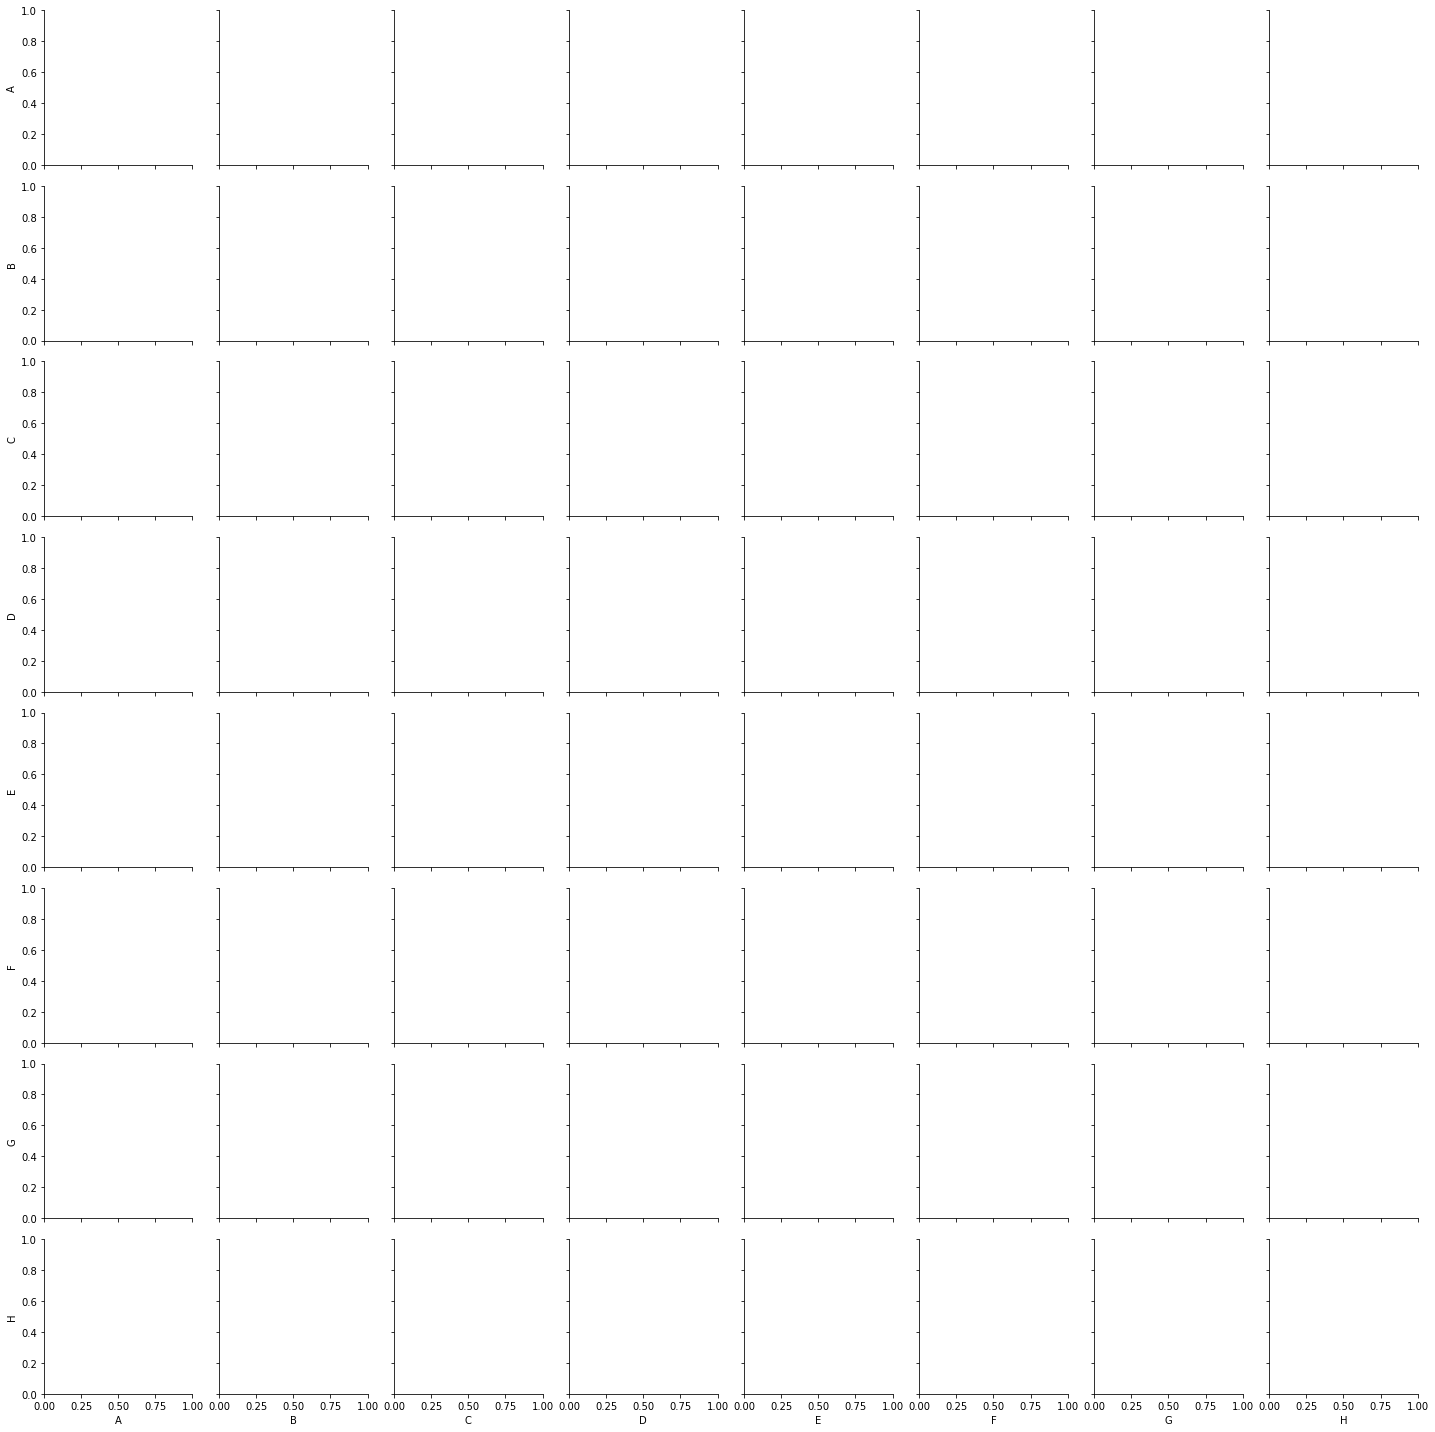

In [100]:
# miejsce na kod
dane=pd.read_csv(plik_danych)
dane=dane.drop(columns=['klasa'])
dane
sns.pairplot(dane.iloc[:,:-1], kind="scatter")
plt.show()



$E.$ Wyznacz i wyświetl macierz korelacji dla zbioru bez ostatniego atrybutu (2 pkt). Wskaż (1 pkt) lub wyznacz stosując odpowiednią formułę (4 pkt) liczbę atrybutów:
* silnie skorelowanych dodatnio (>=0.6)
* słabo skorelowanych dodatnio (>=0.2 ale <0.6)
* nieskorelowanych (>-0.2 i <0.2)
* słabo skorelowanych ujemnie (<=-0.2 ale >-0.6)
* silnie skorelowanych ujemnie (<= -0.6)


imię : Student
nazwisko : Informatyki
indeks : 123456
start : 2019-05-09 09:42:20.459736
ostatni zapis : 2019-05-09 09:43:30.063622
plik danych : http://www.ee.pw.edu.pl/~sarwasg/PRiAD/295138244_Aliaksandr.csv
ile atr : 10
ile ob : 2799
ile brakow : 67
ile ob z brakami : -1
atrybuty - braki : A         4
B         7
C        12
D         4
E         5
F         9
G        10
H        11
I         5
klasa     0
dtype: int64
silnie dodatnio : ['A']
słabo dodatnio : -1
brak korelacji : -1
słabo ujemnie : -1
silnie ujemnie : -1


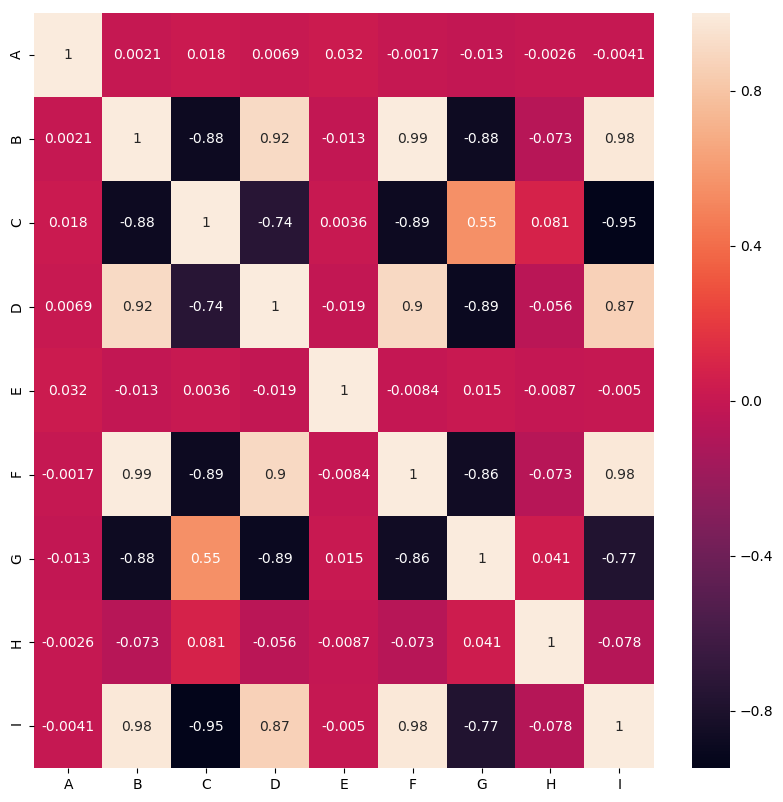

In [86]:
# miejsce na kodd
dane=pd.read_csv(plik_danych)
dane=dane.drop(columns='klasa')
plt.figure(figsize=(10,10),dpi = 100)
sns.heatmap(dane.corr(),annot = dane.corr())
# zamiast '-1' wstaw odpowiednie wartości lub formuły
sprawdzian['silnie dodatnio'] = ['A'] # zamiast '-1' powinna być liczba atrybutów spełniających kryterium
sprawdzian['słabo dodatnio'] = -1 
sprawdzian['brak korelacji'] = -1
sprawdzian['słabo ujemnie'] = -1
sprawdzian['silnie ujemnie'] = -1
zapisz(nazwa_pliku,sprawdzian) # zapis - tu nic nie zmieniaj

$F.$ Wyciągnij wnioski z obserwacji wykresów punktowych i analizy korelacji (3 pkt)

$Odp. F:$

tu wpisz wnioski



Widzimy ze na dioganali elementy maja 1 bo na diagonali jest pokazana korelacja z sama z sobo. 
Na wykresie widac ze atrybuty skrajne sa mocno zkorelowane 
Za pomoca tego wykresu mozna latwo zauwazyc ktore atrybutu maja mniejsze skorelowanie 

$G.$ Ostatni atrybut ma odmienny od pozostałych charakter - zawiera informację o klasie do której przynależy obiekt. 
* określ/oblicz liczbę klas (1/2 pkt)
* określ/oblicz: liczbę obiektów w każdej klasie (1/2 pkt)

In [6]:
# miejsce na kod

# zamiast '-1' wstaw odpowiednie wartości lub formuły 
sprawdzian['ile klas'] = -1
sprawdzian['ile obiektów w klasach'] = np.array([-1,-1]) # liczba obiektów w klasach (wekt. może być dłuższy)
zapisz(nazwa_pliku,sprawdzian) # zapis - tu nic nie zmieniaj

imię : Student
nazwisko : Informatyki
indeks : 123456
start : 2019-04-29 09:13:55.554004
ostatni zapis : 2019-04-29 09:16:16.271641
plik danych : http://www.ee.pw.edu.pl/~iwanowsm/PRiAD/dane1.csv
silnie dodatnio : -1
słabo dodatnio : -1
brak korelacji : -1
słabo ujemnie : -1
silnie ujemnie : -1
ile klas : -1
ile obiektów w klasach : [-1 -1]


$H.$ Wyświetl macierz wykresów punktowych z podziałem na klasy (2 pkt). Przyjrzyj się wykresowi i oceń, które atrybuty mają wpływ na przynależność obiektu do klasy (atrybuty istotne), odpowiedź uzasadnij. Jakie inne wnioski można wyciągnąć z obserwacji wykresów ? Zapisz je. (3 pkt)

In [7]:
# miejsce na kod


$Odp. H:$

tu wpisz odpowiedź, uzasadnienie i inne wnioski

$I.$ Jak wyglądają wartości podstawowych miar dla atrybutów istotnych obiektów w poszczególnych klasach ? Wyświetl statystyki opisowe dla tych atrybutów (4 pkt)

In [8]:
# miejsce na kod


$J.$ Dobierz typ wykresu, na którym - Twoim zdaniem - najlepiej będą uwidocznione różnice międzyklasowe. Wyświetl tego typu wykresy dla atrybutów istotnych (4 pkt). 

In [9]:
# miejsce na kod


$K.$ Jak przynależność do klas zależy od wartości istotnych atrybutów ? (3 pkt)

$Odp.K$

tu wpisz odpowiedź

$L.$ Zastosuj na danych wybraną metodę grupowania (4 pkt). Wyniki grupowania porównaj z klasami na wykresach punktowych (2 pkt) oraz numerycznie przy pomocy macierzy pomyłek (2 pkt). Wyciągnij i opisz wnioski (4 pkt).

In [10]:
# miejsce na kod - grupowanie


In [11]:
# miejsce na kod - wykresy


In [12]:
# miejsce na kod - macierz pomyłek


$Odp.L$ :

Wnioski z grupowania

$KONIEC$ 

In [13]:
# nic tu nie rób, jedynie uruchom !
sprawdzian['koniec'] = datetime.datetime.now() 
zapisz(nazwa_pliku,sprawdzian) 

imię : Student
nazwisko : Informatyki
indeks : 123456
start : 2019-04-29 09:13:55.554004
ostatni zapis : 2019-04-29 09:16:32.455788
plik danych : http://www.ee.pw.edu.pl/~iwanowsm/PRiAD/dane1.csv
silnie dodatnio : -1
słabo dodatnio : -1
brak korelacji : -1
słabo ujemnie : -1
silnie ujemnie : -1
ile klas : -1
ile obiektów w klasach : [-1 -1]
koniec : 2019-04-29 09:16:32.455788


Suma punktów do zdobycia = 60 

**Nie zapomnij wgrać plik z otrzymanymi danymi oraz plik jupyter notebooka do ISOD-a !**